In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
from root_pandas import *

In [26]:

weighted = read_root('store/tmp/DATA_B2Kstmumu_ALL.Reduce.ApplyTrigger.ApplyCut.CalcSWeights.root')
b2kstmumu = read_root('store/tmp/DATA_B2Kstmumu_ALL.Reduce.ApplyTrigger.ApplyCut.ApplyClassifier_classifier.root')


In [34]:
b2kstmumu['weight'] = weighted['sigYield_sw'].values
b2kstmumu['clf'] = b2kstmumu['classifier']

In [38]:
b2dmumu = read_root('store/tmp/classified_signal.root')
from scipy.special import logit
b2dmumu = b2dmumu.query('signal == 1')
b2dmumu['clf'] = logit(b2dmumu['clf'])

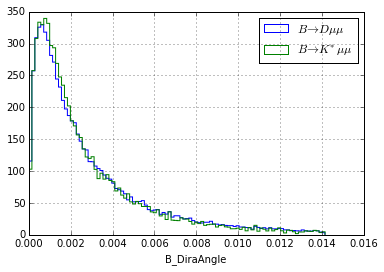

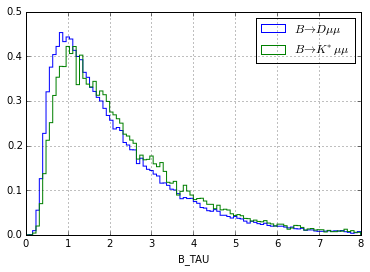

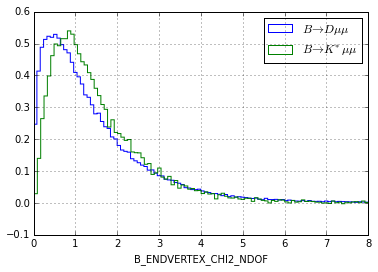

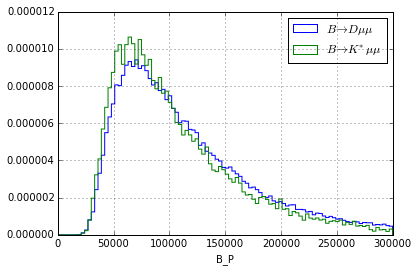

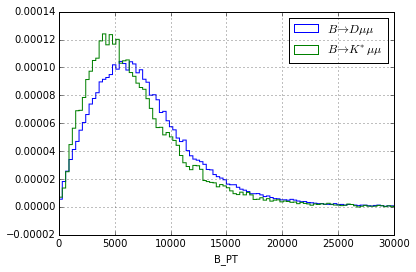

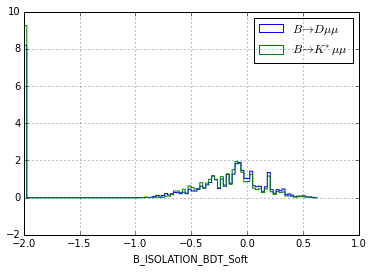

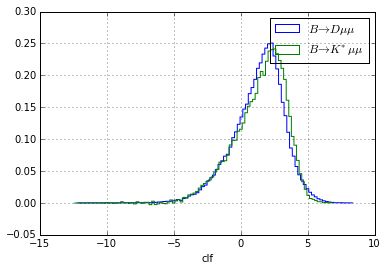

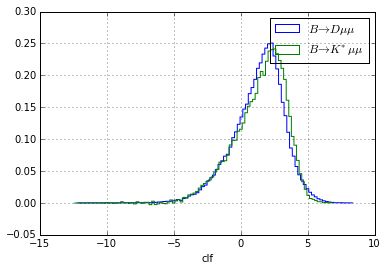

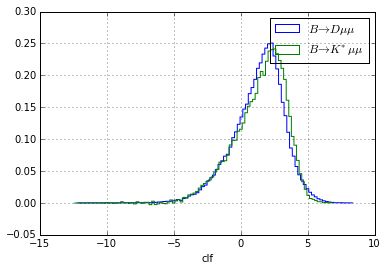

In [39]:
from pipe import classifier_variables
classifier_variables.append('clf')

ranges = {
    'B_TAU': (0, 8),
    'B_P': (0, 300000),
    'B_PT': (0, 30000),
}
for v in classifier_variables:
    try:
        rng = ranges[v]
    except KeyError:
        rng = None
            
    b2dmumu[v].hist(bins=100, histtype='step', normed=True, range=rng, label='$B\\to D\\mu\\mu$')
    b2kstmumu[v].hist(bins=100, weights=df.weight.values, histtype='step', normed=True, range=rng, label='$B\\to K^*\\mu\\mu$')
    plt.legend(loc='best')
    plt.xlabel(v)
    plt.show()